# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

#### Note:
* 只有SGD有nesterov及momentum之超參數
* 以單一optimizer之整體accuracy表現而言，lr 0.001 > 0.00001 > 0.1

#### 各optimizer與learning rate組合之訓練結果 (以lr =0.001時表現效果最好)
* SGD 在lr=0.001時，accuracy最高達0.6900
* RMSprop 在lr=0.001時，accuracy最高達0.7181
* AdaGrad 在lr=0.001時，accuracy最高達0.5629
* Adam 在lr=0.001時，accuracy最高達0.7627

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-3, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

## 1. optimizer = SGD v.s. learning rate

In [7]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W0803 17:09:59.026635 31536 deprecation_wrapper.py:119] From E:\Users\moon\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0803 17:09:59.031635 31536 deprecation_wrapper.py:119] From E:\Users\moon\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0803 17:09:59.051636 31536 deprecation_wrapper.py:119] From E:\Users\moon\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0803 17:09:59.065637 31536 deprecation_wrapper.py:119] From E:\Users\moon\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0803 17:09:59.068637 31536 depr

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0803 17:09:59.442659 31536 deprecation.py:323] From E:\Users\moon\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 306us/step - loss: 14.2241 - acc: 0.1003 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 15s 297us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 15s 297us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 15s 296us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 15s 295us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 15s 291us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 15s 296us/step - loss: 14.5063 - acc: 0.1000 -

50000/50000 [==============================] - 15s 300us/step - loss: 2.0186 - acc: 0.2732 - val_loss: 1.8560 - val_acc: 0.3411
Epoch 2/50
50000/50000 [==============================] - 15s 297us/step - loss: 1.7990 - acc: 0.3669 - val_loss: 1.7530 - val_acc: 0.3845
Epoch 3/50
50000/50000 [==============================] - 15s 299us/step - loss: 1.7181 - acc: 0.3953 - val_loss: 1.6922 - val_acc: 0.4009
Epoch 4/50
50000/50000 [==============================] - 15s 298us/step - loss: 1.6630 - acc: 0.4160 - val_loss: 1.6415 - val_acc: 0.4208
Epoch 5/50
50000/50000 [==============================] - 15s 296us/step - loss: 1.6184 - acc: 0.4321 - val_loss: 1.6101 - val_acc: 0.4373
Epoch 6/50
50000/50000 [==============================] - 15s 295us/step - loss: 1.5806 - acc: 0.4450 - val_loss: 1.5749 - val_acc: 0.4510
Epoch 7/50
50000/50000 [==============================] - 15s 291us/step - loss: 1.5481 - acc: 0.4585 - val_loss: 1.5634 - val_acc: 0.4477
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 15s 298us/step - loss: 2.2631 - acc: 0.1407 - val_loss: 2.2503 - val_acc: 0.1523
Epoch 3/50
50000/50000 [==============================] - 15s 294us/step - loss: 2.2393 - acc: 0.1648 - val_loss: 2.2298 - val_acc: 0.1727
Epoch 4/50
50000/50000 [==============================] - 14s 290us/step - loss: 2.2198 - acc: 0.1827 - val_loss: 2.2123 - val_acc: 0.1896
Epoch 5/50
50000/50000 [==============================] - 15s 294us/step - loss: 2.2030 - acc: 0.1983 - val_loss: 2.1966 - val_acc: 0.2010
Epoch 6/50
50000/50000 [==============================] - 15s 301us/step - loss: 2.1881 - acc: 0.2099 - val_loss: 2.1826 - val_acc: 0.2138
Epoch 7/50
50000/50000 [==============================] - 15s 293us/step - loss: 2.1745 - acc: 0.2209 - val_loss: 2.1697 - val_acc: 0.2202
Epoch 8/50
50000/50000 [==============================] - 15s 290us/step - loss: 2.1618 - acc: 0.2293 - val_loss: 2.1576 - val_acc: 0.2333
Epoch 9/50
50000/50000 [===

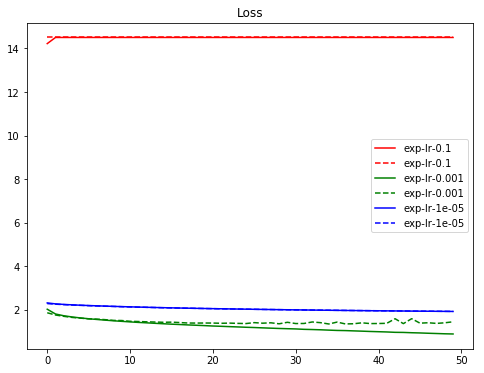

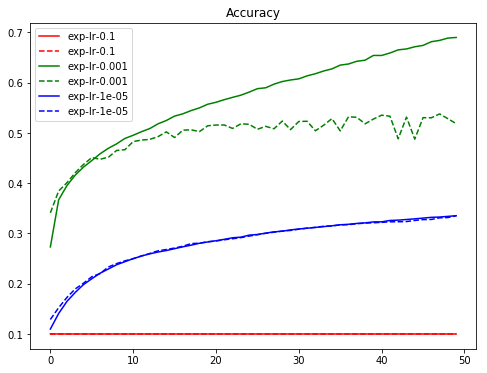

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## 2. optimizer = RMSprop v.s. learning rate

In [11]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.rmsprop(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 188us/step - loss: 2.3455 - acc: 0.2082 - val_loss: 1.9704 - val_acc: 0.2763
Epoch 2/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.9021 - acc: 0.3116 - val_loss: 1.9160 - val_acc: 0.3214
Epoch 3/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.7976 - acc: 0.3542 - val_loss: 1.7992 - val_acc: 0.3379
Epoch 4/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.7224 - acc: 0.3802 - val_loss: 1.7574 - val_acc: 0.3674
Epoch 5/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.6606 - acc: 0.4057 - val_loss: 1.7776 - val_acc: 0.3681
Epoch 6/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.6169 - acc: 0.4229 - val_loss: 1.6366 - val_acc: 0.4141
Epoch 7/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.5713 - acc: 0.4388 - val_loss: 1.5481 - 

50000/50000 [==============================] - 9s 187us/step - loss: 2.1120 - acc: 0.2546 - val_loss: 2.0073 - val_acc: 0.2867
Epoch 2/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.9492 - acc: 0.3185 - val_loss: 1.9076 - val_acc: 0.3307
Epoch 3/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.8777 - acc: 0.3463 - val_loss: 1.8538 - val_acc: 0.3487
Epoch 4/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.8311 - acc: 0.3611 - val_loss: 1.8135 - val_acc: 0.3697
Epoch 5/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.7976 - acc: 0.3744 - val_loss: 1.7868 - val_acc: 0.3738
Epoch 6/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.7701 - acc: 0.3846 - val_loss: 1.7661 - val_acc: 0.3835
Epoch 7/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.7475 - acc: 0.3927 - val_loss: 1.7462 - val_acc: 0.3861
Epoch 8/50
50000/50000 [=====================

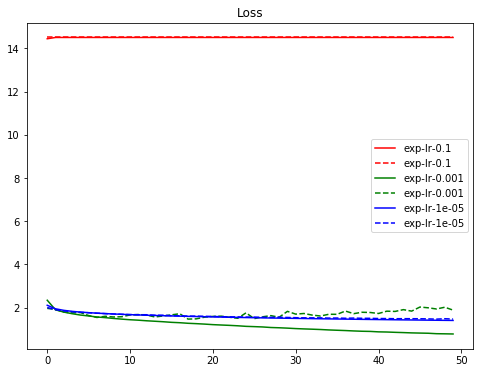

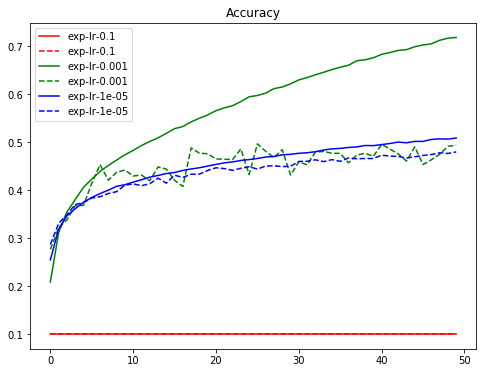

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## 3. optimizer = AdaGrad v.s. learning rate

In [13]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.adagrad(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 17s 341us/step - loss: 1.9902 - acc: 0.2893 - val_loss: 1.8517 - val_acc: 0.3492
Epoch 2/50
50000/50000 [==============================] - 16s 329us/step - loss: 1.7975 - acc: 0.3657 - val_loss: 1.8539 - val_acc: 0.3505
Epoch 3/50
50000/50000 [==============================] - 17s 334us/step - loss: 1.7262 - acc: 0.3940 - val_loss: 1.7488 - val_acc: 0.3712
Epoch 4/50
50000/50000 [==============================] - 18s 356us/step - loss: 1.6793 - acc: 0.4125 - val_loss: 1.6834 - val_acc: 0.3964
Epoch 5/50
50000/50000 [==============================] - 19s 388us/step - loss: 1.6439 - acc: 0.4238 - val_loss: 1.7078 - val_acc: 0.4020
Epoch 6/50
50000/50000 [==============================] - 19s 386us/step - loss: 1.6179 - acc: 0.4337 - val_loss: 1.6384 - val_acc: 0.4204
Epoch 7/50
50000/50000 [==============================] - 19s 376us/step - loss: 1.5945 - acc: 0.4438 - val_loss: 1.

50000/50000 [==============================] - 17s 338us/step - loss: 2.2567 - acc: 0.1662 - val_loss: 2.2320 - val_acc: 0.1859
Epoch 2/50
50000/50000 [==============================] - 17s 333us/step - loss: 2.2158 - acc: 0.2063 - val_loss: 2.2059 - val_acc: 0.2116
Epoch 3/50
50000/50000 [==============================] - 17s 331us/step - loss: 2.1950 - acc: 0.2232 - val_loss: 2.1890 - val_acc: 0.2230
Epoch 4/50
50000/50000 [==============================] - 17s 330us/step - loss: 2.1801 - acc: 0.2334 - val_loss: 2.1759 - val_acc: 0.2340
Epoch 5/50
50000/50000 [==============================] - 17s 333us/step - loss: 2.1680 - acc: 0.2432 - val_loss: 2.1647 - val_acc: 0.2391
Epoch 6/50
50000/50000 [==============================] - 17s 334us/step - loss: 2.1576 - acc: 0.2484 - val_loss: 2.1551 - val_acc: 0.2448
Epoch 7/50
50000/50000 [==============================] - 16s 329us/step - loss: 2.1484 - acc: 0.2537 - val_loss: 2.1464 - val_acc: 0.2489
Epoch 8/50
50000/50000 [==============

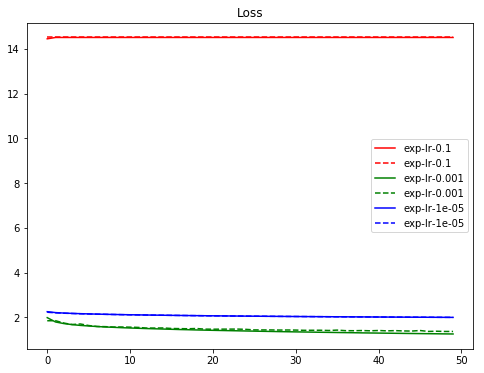

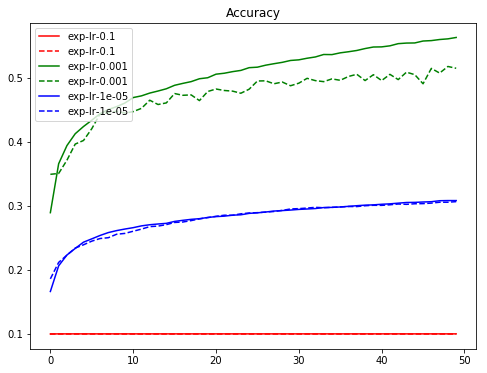

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## 4. optimizer = Adam v.s. learning rate

In [15]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.adam(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 20s 394us/step - loss: 1

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 214us/step - loss: 2.1336 - acc: 0.2404 - val_loss: 2.0007 - val_acc: 0.3122
Epoch 2/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.9465 - acc: 0.3269 - val_loss: 1.8961 - val_acc: 0.3431
Epoch 3/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.8659 - acc: 0.3525 - val_loss: 1.8408 - val_acc: 0.3571
Epoch 4/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.8177 - acc: 0.3701 - val_loss: 1.7980 - val_acc: 0.3734
Epoch 5/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.7802 - acc: 0.3808 - val_loss: 1.7661 - val_acc: 0.3854
Epoch 6/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.7507 - acc: 0.3923 - val_loss: 1.7410 - val_acc: 0.3909
Epoch 7/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.7248 - acc: 0.4022 - val_loss: 1.

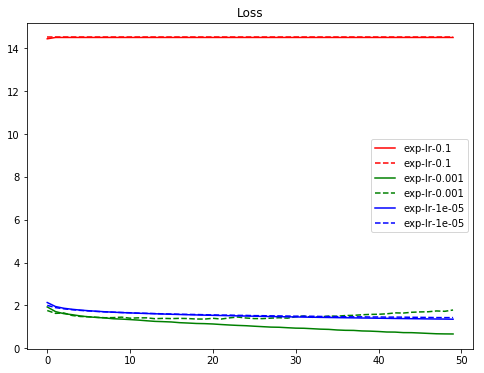

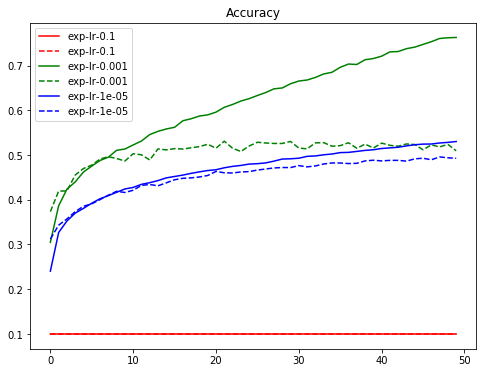

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()